In [1]:
import geopandas as gpd
import pandas as pd
%matplotlib inline

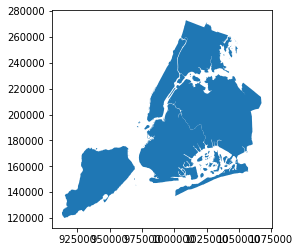

In [2]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros.plot()

In [3]:
nta_path = './data/nta/geo_export_f991e127-3956-4897-8da7-edcbe43426c9.shp'
nta = gpd.read_file(nta_path)
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904797,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712074,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,"POLYGON ((-73.94608 40.82126, -73.94640 40.820..."


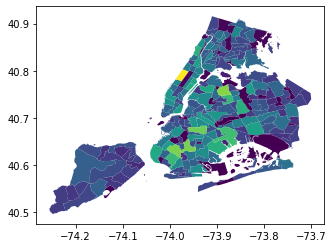

In [4]:
demo_path = './data/nta_census_demographics.csv'
demographics = pd.read_csv(demo_path)

demographics.rename(columns={'Geographic Area - Neighborhood Tabulation Area (NTA)* Code': 'ntacode'}, inplace=True)
demographics.rename(columns={'Total Population 2010 Number':'totpop2010'}, inplace=True)
columns_to_drop = [
    'Geographic Area - Borough',
    'Geographic Area - 2010 Census FIPS County Code',
    'Geographic Area - Neighborhood Tabulation Area (NTA)* Name',
]

demographics = demographics.drop(columns=columns_to_drop)
demographics.head()

nta = nta.merge(demographics, on='ntacode')
nta.plot(column='totpop2010')

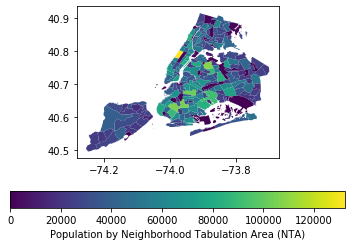

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

nta.plot(column='totpop2010', 
         ax=ax, 
         legend=True,
         legend_kwds={'label': 'Population by Neighborhood Tabulation Area (NTA)',
                      'orientation': 'horizontal'})

In [6]:
import json
from bokeh.io import show, output_file, save
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = nta.to_json())

In [7]:
palette = brewer['BuGn'][8]
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low=0, high=140000)

tick_labels = {'0': '0',
               '20000':'20,000',
               '40000':'40,000',
               '60000':'60,000',
               '80000':'80,000',
               '100000':'100,000',
               '120000':'120,000',
               '140000':'140,000'
              }
color_bar = ColorBar(color_mapper=color_mapper,
                    label_standoff=8,
                    width=500, height=20,
                    border_line_color=None,
                    location=(0,0),
                    orientation='horizontal',
                    major_label_overrides=tick_labels)

p = figure(title = 'Population by Neighborhood Tabulation Area (NTA), 2010',
          plot_height=950, plot_width=950,
          toolbar_location='below',
          tools="pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

ntas = p.patches('xs', 'ys', source=geosource,
                    fill_color= {'field': 'totpop2010',
                                 'transform': color_mapper},
                    line_color='gray',
                    line_width=0.25,
                    fill_alpha=1)

p.add_tools(HoverTool(renderers = [ntas],
                     tooltips= [('NTA Name', '@ntaname'),
                                ('NTA Code', '@ntacode'),
                               ('Population', '@totpop2010')]))

p.add_layout(color_bar, 'below')

show(p)
output_file("ntapop2010.html")
save(p)

'C:\\Users\\aespi\\proj\\pie\\gis\\census\\ntapop2010.html'